imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from utils import create_dataloaders
from utils import plot_tsne
import AutoDecoder as AD

In [2]:
import importlib

In [3]:
import utils as utils
importlib.reload(AD)
importlib.reload(utils)


<module 'utils' from '/home/nativ/Deep_learning_technion/Project - Autodecoder/utils.py'>

In [4]:
# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed = 42
torch.manual_seed(seed)
# Define model parameters
latent_dim = 128  # Dimension of latent space
output_shape = (1, 28, 28)  # Output shape for Fashion MNIST images

# Initialize model
auto_decoder = AD.AutoDecoder(latent_dim, output_shape).to(device)


In [5]:
print(auto_decoder)

AutoDecoder(
  (fc1): Linear(in_features=128, out_features=8192, bias=True)
  (decoder): DecoderCNN(
    (cnn): Sequential(
      (0): ConvTranspose2d(512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
      (9): ConvTranspose2d(128, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (10): ConvTranspose2d(1, 1, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2), bias=False)
      (11): Sigmoid()
    )
  )

In [6]:
# Create data loaders
train_ds, train_dl, test_ds, test_dl = create_dataloaders(data_path="dataset", batch_size=32)

In [7]:
# Initialize latent vectors
train_latents = torch.randn(len(train_ds), latent_dim, requires_grad=True, device=device)
test_latents = torch.randn(len(test_ds), latent_dim, requires_grad=True, device=device)


In [8]:
plot_tsne(train_ds, train_latents, "part1_train_tsne_before.png", plot_title="t-SNE Plot")

<Figure size 800x600 with 0 Axes>

In [9]:

plot_tsne(test_ds, test_latents, "part1_test_tsne_before.png", plot_title="t-SNE Plot")

<Figure size 800x600 with 0 Axes>

In [9]:
# # Split train_ds into train and validation sets
# from torch.utils.data import random_split
# val_size = len(train_ds) // 5  # 20% for validation
# train_size = len(train_ds) - val_size
# train_subset, val_subset = random_split(train_ds, [train_size, val_size])

# train_dl = torch.utils.data.DataLoader(train_subset, batch_size=16, shuffle=True)
# val_dl = torch.utils.data.DataLoader(val_subset, batch_size=16, shuffle=False)
# # Initialize latent vectors
# train_latents = torch.randn(len(train_subset), latent_dim, requires_grad=True, device=device)
# val_latents = torch.randn(len(val_subset), latent_dim, requires_grad=False, device=device)
# test_latents = torch.randn(len(test_ds), latent_dim, requires_grad=False, device=device)

In [10]:
# Initialize optimizer
optimizer = optim.Adam(list(auto_decoder.parameters()) + [train_latents], lr=1e-3)

In [11]:
# auto_decoder.load_state_dict(torch.load('auto_decoder_parameters.pth'))
train_losses = AD.train_auto_decoder(auto_decoder, train_dl, optimizer, train_latents, device, epochs=100)
# save auto_decoder parameters
torch.save(auto_decoder.state_dict(), 'auto_decoder_parameters.pth')

Epoch [1/100], Train Loss: 0.8803
Epoch [2/100], Train Loss: 0.8079
Epoch [3/100], Train Loss: 0.6220
Epoch [4/100], Train Loss: 0.4867
Epoch [5/100], Train Loss: 0.4153
Epoch [6/100], Train Loss: 0.3696
Epoch [7/100], Train Loss: 0.3567
Epoch [8/100], Train Loss: 0.3239
Epoch [9/100], Train Loss: 0.3017
Epoch [10/100], Train Loss: 0.2935
Epoch [11/100], Train Loss: 0.2795
Epoch [12/100], Train Loss: 0.2574
Epoch [13/100], Train Loss: 0.2391
Epoch [14/100], Train Loss: 0.2293
Epoch [15/100], Train Loss: 0.2198
Epoch [16/100], Train Loss: 0.2048
Epoch [17/100], Train Loss: 0.1953
Epoch [18/100], Train Loss: 0.1874
Epoch [19/100], Train Loss: 0.1807
Epoch [20/100], Train Loss: 0.1773
Epoch [21/100], Train Loss: 0.1697
Epoch [22/100], Train Loss: 0.1667
Epoch [23/100], Train Loss: 0.1652
Epoch [24/100], Train Loss: 0.1574
Epoch [25/100], Train Loss: 0.1571
Epoch [26/100], Train Loss: 0.1604
Epoch [27/100], Train Loss: 0.1594
Epoch [28/100], Train Loss: 0.1546
Epoch [29/100], Train Loss: 0

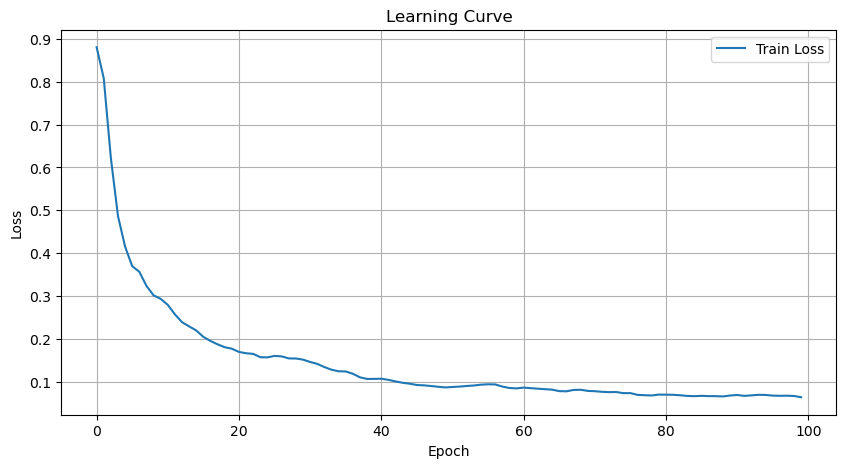

In [12]:
AD.plot_learning_curve(train_losses)

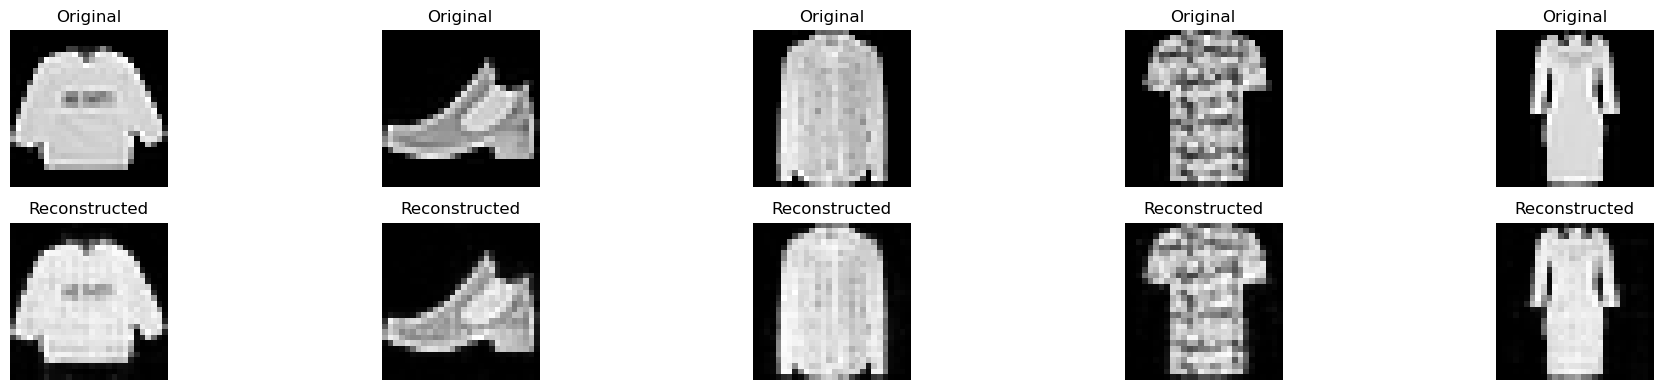

In [21]:
AD.visualize_reconstructions(auto_decoder, train_dl, train_latents, device, num_samples=5)

In [14]:
plot_tsne(train_ds, train_latents, "part1_train_tsne.png", plot_title="t-SNE Plot")

<Figure size 800x600 with 0 Axes>

In [15]:
train_latents_optimizer = optim.Adam([train_latents], lr=1e-2)

In [16]:
from evaluate import evaluate_model

In [20]:

evaluate_model(auto_decoder, train_dl, train_latents_optimizer, train_latents, epochs=10, device=device)

0.061628607916645706

In [22]:
test_latents_optimizer = optim.Adam([test_latents], lr=1e-2)

In [26]:

evaluate_model(auto_decoder, test_dl, test_latents_optimizer, test_latents, epochs=100, device=device)

0.14814518531784415

In [24]:
plot_tsne(test_ds, test_latents, "part1_test_tsne.png", plot_title="t-SNE Plot")

<Figure size 800x600 with 0 Axes>

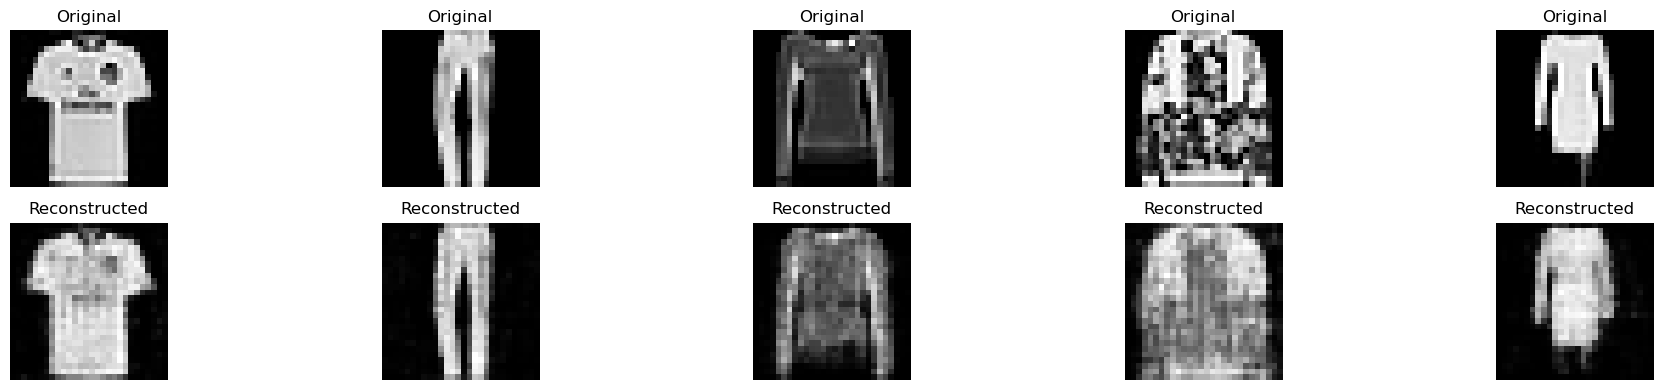

In [27]:
AD.visualize_reconstructions(auto_decoder, test_dl, test_latents, device,num_samples=5)

In [195]:
random_latents = torch.randn(5, latent_dim, requires_grad=False, device=device)

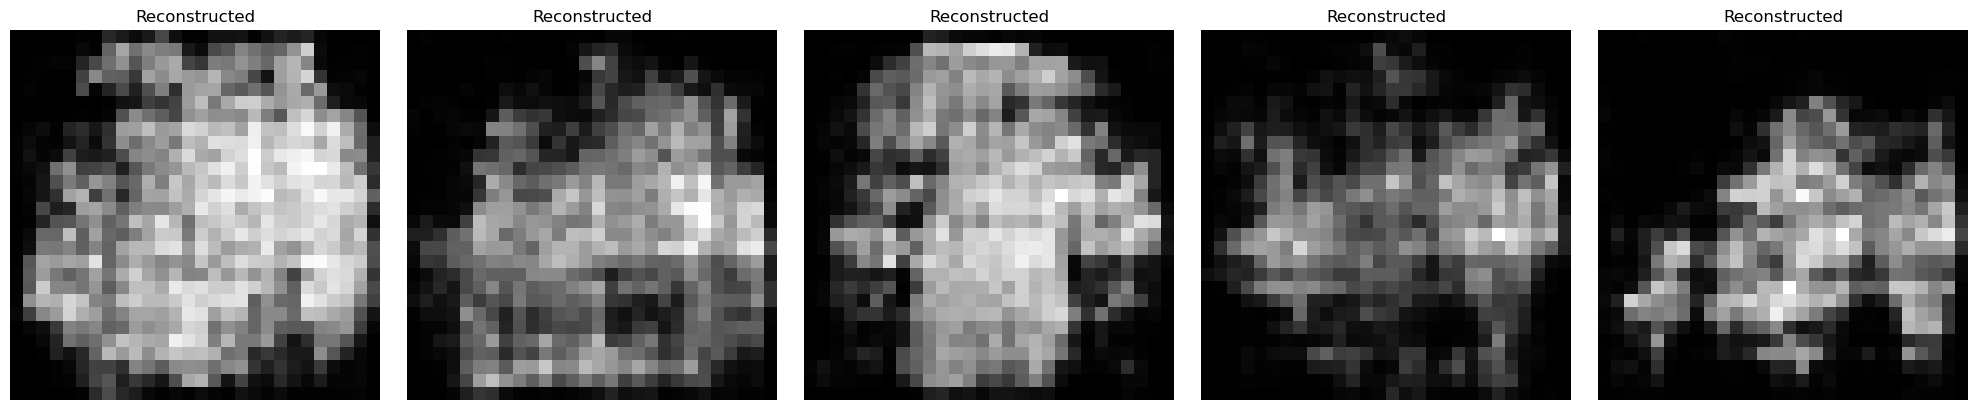

In [132]:
AD.visualize_from_latents(auto_decoder, random_latents, device,num_samples=5)


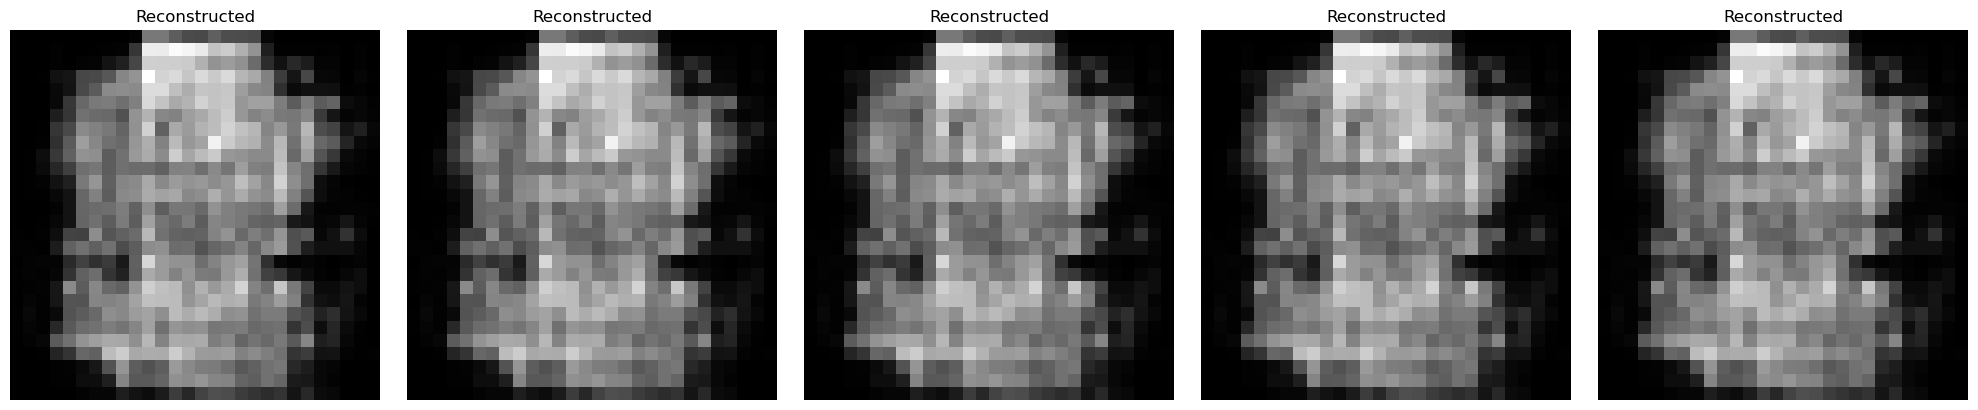

In [199]:
ones_latents = torch.ones(5, latent_dim, requires_grad=False, device=device)
AD.visualize_from_latents(auto_decoder, ones_latents, device,num_samples=5)

In [ ]:

zeros_latents = torch.zeros(5, latent_dim, requires_grad=False, device=device)
AD.visualize_from_latents(auto_decoder, zeros_latents, device,num_samples=5)
